# Numerical simulation | Atwood machine

[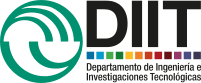](https://ingenieria.unlam.edu.ar/)  
[by-nc-sa_80x15.png](https://creativecommons.org/licenses/by-sa/4.0/) 
2025 [Víctor A. Bettachini](mailto:vbettachini@unlam.edu.ar)  

---

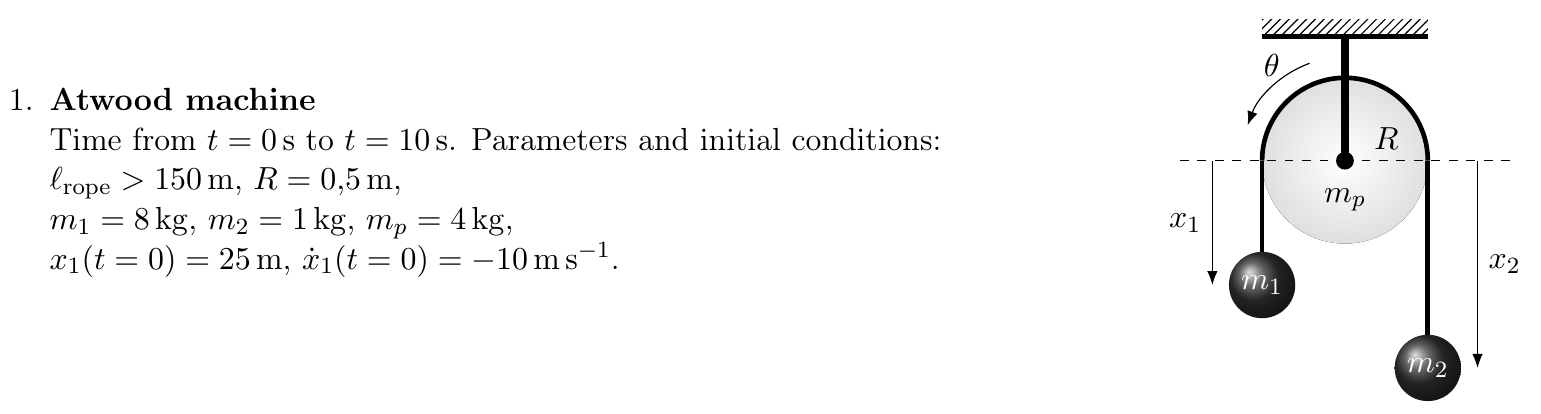

## Symbolic solution

In [1]:
import sympy as sm # import functions for symbolic manipulations
from sympy.physics import mechanics as me
me.init_vprinting() # dot notation for velocity and acceleration

### Physical model for this system

In [2]:
e = me.ReferenceFrame('e') # Cartesian frame of reference
t = sm.symbols('t') # time
M, R, m1, m2, g, l = sm.symbols(r'M, R, m_1, m_2, g, \ell', positive=True) # Physical parameters

#### Generalized coordinates and constraints

In [3]:
x1, xp, theta = me.dynamicsymbols(r'x_1, x_p, \theta') # Generalized coordinates

In [4]:
# constraint 1: rope's length is constant
f1 = sm.Eq(x1+ xp + sm.pi* R - l, 0 )
f1

In [5]:
xp_f1 = sm.Eq(xp, sm.solveset(f1.lhs, xp).args[0])
xp_f1

In [6]:
# constraint 2: the rope moves without slipping
# this is a constraint over the velocities
f2 = sm.Eq(x1.diff(t)/R - theta.diff(t)/ sm.pi, 0)
f2

#### Positions as functions of the generalized coordinates

In [7]:
m1_r = -R * e.x + x1* (-e.y) # unit vector directed upward
m2_r = R * e.x + xp_f1.rhs* (-e.y) # remaining length corresponding to x1 and half pulley
m1_r, m2_r

### Translational kinetic energies

In [8]:
def energyKineticTranslation(mass, position, frameOfReference):
    """
    Given a mass and the position of a point particle in a frame of reference, it returns its kinetic energy.
    
    Parameters
    ----------
    mass: (sympy.core.symbol.Symbol)
        of one particle
    position: (sympy.physics.vector.vector.Vector)
        of the particle's center of mass
    frameOfReference: (sympy.physics.vector.frame.ReferenceFrame)
        in which the position is expressed
    
    Returns
    -------
    Sympy Equality (sympy.core.relational.Equality)
        The kinetic energy of the system is made explicit on the right-hand side, as a function of the generalized coordinates and velocities, and time.
        Kinetic Energy, T = (m/2) \dot{\vec{r}} \cdot\dot{\vec{r}}
    """
    velocity = position.dt(frameOfReference)
    oneHalf = sm.Rational(1,2) # Rational: a quotient of integers
    T_translational = sm.Eq(
        sm.Symbol('T_\mathrm{translational}'),
        oneHalf* mass* velocity.dot(velocity)
        ).simplify()
    return T_translational

In [9]:
m1_T = energyKineticTranslation(m1, m1_r, e)
m2_T = energyKineticTranslation(m2, m2_r, e)

In [10]:
T_translational = sm.Eq(
  m1_T.lhs,
  m1_T.rhs + m2_T.rhs
  ).simplify()
T_translational

### Rotational kinetic energy

In [11]:
def energyKineticRotational(momentOfInertia, angularVelocity):
    """
    Calculates the kinetic energy of a body rotating around an axis.

    Parameters
    ----------
    momentOfInertia : Sympy Multiplication (sympy.core.mul.Mul)
        Expressed using the axis as reference.
    angularVelocity : Sympy Multiplication (sympy.core.mul.Mul)
        Angular velocity around an axis.

    Returns
    -------
    Sympy Equality (sympy.Equality)
        Rotational kinetic energy (I/2)* omega**2
    """
    oneHalf = sm.Rational(1,2)
    T_rotational = sm.Eq(
        sm.Symbol('T_{rotational}'),
        oneHalf* momentOfInertia * angularVelocity**2
     ).simplify()
    return T_rotational

In [12]:
oneHalf = sm.Rational(1,2) # Rational: alternatively, we could use 0.5 
cylinder_I = sm.Eq(
  sm.Symbol('I'),
  oneHalf* M* R**2
  ) # moment of inertia about an axis through the longitudinal axis of symmetry
cylinder_I

In [13]:
cylinder_angularVelocity = sm.Eq(
  sm.Symbol(r'\omega'),
  theta.diff(t)
  )
cylinder_angularVelocity

In [14]:
pulley_T_rotational = energyKineticRotational(
  cylinder_I.rhs,
  cylinder_angularVelocity.rhs
)
pulley_T_rotational

Let's take advantage of the constraint function for pulley and rope.

In [15]:
thetaDot_f2 = sm.solveset(f2.lhs, cylinder_angularVelocity.rhs ).args[0]
sm.Eq(cylinder_angularVelocity.rhs, thetaDot_f2 )

In [16]:
pulley_x1_T_rotational = sm.Eq(
  sm.Symbol('T_\mathrm{rotational}'),
  pulley_T_rotational.subs(cylinder_angularVelocity.rhs, thetaDot_f2).rhs
  )
pulley_x1_T_rotational

### Kinetic energy of the system

We add translational and rotational kinetic energies to find the kinetic energy of the system.

In [17]:
T = sm.Eq(
  sm.Symbol('T'),
  T_translational.rhs + pulley_x1_T_rotational.rhs
  ).simplify() 
T

### Potential energy

In [18]:
def gravitationalPotentialEnergy(mass, position, accelerationDueToGravity):
    """
    It returns the gravitational potential energy of a particle of mass m whose position r is given in a frame of reference in which g is the Earth's gravitational acceleration.
    
    Parameters
    ----------
    accelerationDueToGravity: (sympy.physics.vector.vector.Vector)
        vector oriented according to the frame of reference
    mass: (sympy.core.symbol.Symbol
        of the particle
    position: (sympy.core.symbol.Symbol)
        of the center of mass in a frame of reference related to accelerationDueToGravity
    
    Returns
    -------
    Equality Sympy (sympy.core.relational.Equality)
        On the right hand side, it explains the potential energy of the system as a function of generalized coordinates and time.
    generalizedCoordinate: (sympy.core.symbol.Symbol)
        V = - (m \vec{accelerationDueToGravity}) \cdot{position}
    """
    V_gravitational = sm.Eq(
        sm.Symbol('V_{gravitational}'),
        - (mass* accelerationDueToGravity).dot(position)
        ).simplify()
    return V_gravitational

In [19]:
g_vector = g* (-e.y) # acceleration due to gravity directed toward -y 
m1_V = gravitationalPotentialEnergy(m1, m1_r, g_vector)
m2_V = gravitationalPotentialEnergy(m2, m2_r, g_vector)

In [20]:
V = sm.Eq(
  m1_V.lhs,
  m1_V.rhs + m2_V.rhs
  ).simplify()
V

### Euler-Lagrange equation

In [21]:
def eulerLagrange(T, V, coordinateGeneralized):
    '''    
    Provides the Euler-Lagrange equation for one generalized coordinate starting from the energies.
    
    Parameters
    ----------
    T : Sympy Equality (sympy.core.relational.Equality)
        The kinetic energy of the system is explicit on the right-hand side, as a function of the generalized coordinates and velocities, and time.
    V : Igualdad Sympy (sympy.core.relational.Equality)
        The potential energy of the system is explicit on the right-hand side, as a function of the generalized coordinates and velocities, and time.
    coordinateGeneralized: Sympy Symbol (sympy.core.symbol.Symbol)
        for which we are looking the Euler-Lagrange equation
        
    Returns
    -------
    Sympy Equality (sympy.core.relational.Equality)
        Homogeneous Euler-Lagrange equation
    '''
    lagrangian = (T.rhs - V.rhs).expand()
    t = sm.Symbol('t') # since we have to differentiate respect to time, the function diff declares t as a symbol
    return sm.Eq(
        lagrangian.diff(coordinateGeneralized) 
        - lagrangian.diff(coordinateGeneralized.diff(t)).diff(t)
        , 0
    ).simplify()

In [22]:
x1_EL = eulerLagrange(T, V, x1)
x1_EL

This is an homogeneus second order linear differential equation. We can solve for $\ddot{x}$.

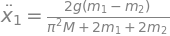

In [23]:
x_pp = sm.Eq(
      x1.diff(t,2),
      list( sm.solveset(x1_EL, x1.diff(t,2) ) )[0]  # solveset returns a set, that we convert into a list
      )
x_pp # acceleration = x dot dot [m s-2]

## Analytical solution of the Euler-Lagrange equation

Solving this equation analytically is simple, integrating $\ddot{x}$ twice in time to get $x(t)$. 

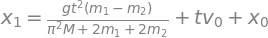

In [24]:
x_0, v_0 = sm.symbols('x_0 v_0')
sm.Eq(x1, oneHalf* x_pp.rhs* t**2+ v_0* t + x_0)

In this case, of a simple mechanical system, solving the Euler-Lagrange equation analytically turned out to be trivial.

But doing this in complex systems could be engaging or even impossible. That's why we delve into the alternative of a **numerical solution**.

## Numerical solution

### Numerical integration of a first order differential equation
> Reference  
["Numerical methods for ordinary differential equations" Wikipedia, The Free Encyclopedia](https://en.wikipedia.org/wiki/Numerical_methods_for_ordinary_differential_equations#Euler_method)

It isn't difficult to prove that positions at succesive times $x(t_i)$, $x(t_{i+1})$ are related through the velocity at some intermediate instant
$$
x(t_{i+1}) 
= x(t_i) + \frac{\partial x}{\partial t}\bigg|_{t_i \leq t \leq t_{i+1}} (t_{i+1} - t_i)
= x(t_i) + \dot{x}|_{t_i \leq t \leq t_{i+1}} (t_{i+1} - t_i) .
$$

Euler method for numerical integration is based in that if $(t_{i+1} - t_i) \ll 1$, the error from using the velocity at $t_i$ is small
$$
x(t_{i+1}) \simeq x(t_i) + \dot{x}(t_i) (t_{i+1} - t_i).
$$
Thus, it's just a matter of calculating $\dot{x}(t_{i+1})$ and move on to $x(t_{i+2})$. And keep doing this starting from the initial conditions
- $x(t_0)$
- $\dot{x}(t_0)$

### State vector at $t_i$

The most efficient numerical methods work by solving a first order differential equation. To make use of them, the equation for the dynamics must be reduced from a **second order ordinary differential equation** to a **system of two first order differential equations**.

The implementation of these methods calculates succesive **state vectors**
$$
\vec{y}_i 
= \begin{vmatrix}
y_{0,i}\\
y_{1,i}
\end{vmatrix}
= \begin{vmatrix}
x_i\\
\dot{x}_i
\end{vmatrix},
$$
where the first element of each vector, $y_{0,i}$, is the position $x_i$ at some instant $t_i$ and the second, $y_{1,i}$, is the velocity.

Following Euler method, starting from the state vector at $t_i$, $\vec{y}_{i}$, the vector is calculated at $t_{i+1}$ as
$$
\vec{y}_{i+1} = \vec{y}_i + \dot{\vec{y}}_n(t_i) \Delta t_i,
$$
where $\Delta t_i = t_{i+1} - t_i$, e $\dot{\vec{y}}_n(t_i)$ is the derivative of the state vector with respect to time,
$$
\dot{\vec{y}}_i = 
\begin{vmatrix}
\dot{x}_i \\
\ddot{x}_i
\end{vmatrix}.
$$

The second component of $\dot{\vec{y}}_n(t_i)$, $\dot{y}_{1,i}$, corresponds to $\ddot{x}_i$, that is, the **generalized acceleration**.
Every generalized acceleration needed to simulate the dynamics of a system is found by solving the system of equations produced by the Euler-Lagrange procedure.

For the Atwood machine, the relation between the state vector, $\vec{y}$, and its derivative with respect to time, $\dot{\vec{y}}$, is the following:
$$
\left\{
\begin{array}{l}
y_{0,i} = x_i\\
y_{1,i} = \dot{y}_{0,i} =  \dot{x}_i\\
\dot{y}_{1,i} = \ddot{y}_{0,i} = \ddot{x}_i = g \frac{(m1 - m_2)}{m_1 + m_2}\\
\end{array}
\right. ,
$$

For this system we have $\ddot{x}_i \equiv \mathrm{constant}$, but in a general case,
$$
\ddot{x}_i = \ddot{x}_i(t_i, x_j, \dot{x}_j),
$$
it can be a function of $t_i, x_j$ and/or $\dot{x}_j$.  
**Important:** note that $x_j$ and $\dot{x}_j$ have $j$ as index, i.e. a generalized acceleration $\ddot{x}_i$ can be dependent no just of the corresponding generalized coordinate and velocity, with index $i$, but also of others, i.e. with indices $j \neq i$.

### Runge-Kutta method
> Reference:
> - ["Runge–Kutta methods" Wikipedia, The Free Encyclopedia.](https://en.wikipedia.org/wiki/Runge%E2%80%93Kutta_methods)

We are going to use one of the Runge-Kutta methods to integrate the set of differential equations (ODE) generated from the Euler-Lagrange equations, being the Euler method a particular case among them.
These methods calculate $y_{i+1}$ using more than just one previous state vector.

#### SciPy implementation of Runge-Kutta
> References:
>- https://docs.scipy.org/doc/scipy/tutorial/integrate.html#ordinary-differential-equations-solve-ivp
>- https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.solve_ivp.html
> - https://pundit.pratt.duke.edu/wiki/Python:Ordinary_Differential_Equations/Examples
> - http://sam-dolan.staff.shef.ac.uk/mas212/notebooks/ODE_Example.html
> - https://ipython-books.github.io/123-simulating-an-ordinary-differential-equation-with-scipy/

An order 5(4) Runge-Kutta method will be used, i.e. where the error is controlled asumming the fourth order method is exact, but the $\Delta t$ are calculated using the formula for the fifth order. It is a **variable step method** in which at each $y_i$ estimates the error for the next step, $y_{i+1}$, given a $\Delta t_i$. The method tries to maximize each $\Delta t_i$ so less steps are required, but always restricted by a limit for the error.

### Numerical values

We need to set the value of $\ddot{x}$ in terms of the physical parameters.

In [25]:
# physical parameters
g_magnitude = 9.81 # [m s-2]
m_1_magnitude = 8 # [kg]
m_2_magnitude = 1 # [kg]
M_magnitude = 4 # [kg]
magnitudes = {
    g : g_magnitude,
    m1 : m_1_magnitude,
    m2 : m_2_magnitude,
    M : M_magnitude,
}
x1_pp_magnitudes = x_pp.subs(magnitudes)
x1_pp_magnitudes # [m s-2]

### Initial conditions

Now we set the initial conditions and the range for time.

In [26]:
# library for numerical calculations
import numpy as np

In [27]:
y_initial = [25, -10] # [SI units] position, velocity, in the same state vector
t_range = np.linspace(0, 10, 100) # intial and final times, and how many intermediate steps
t_range

array([ 0.        ,  0.1010101 ,  0.2020202 ,  0.3030303 ,  0.4040404 ,
        0.50505051,  0.60606061,  0.70707071,  0.80808081,  0.90909091,
        1.01010101,  1.11111111,  1.21212121,  1.31313131,  1.41414141,
        1.51515152,  1.61616162,  1.71717172,  1.81818182,  1.91919192,
        2.02020202,  2.12121212,  2.22222222,  2.32323232,  2.42424242,
        2.52525253,  2.62626263,  2.72727273,  2.82828283,  2.92929293,
        3.03030303,  3.13131313,  3.23232323,  3.33333333,  3.43434343,
        3.53535354,  3.63636364,  3.73737374,  3.83838384,  3.93939394,
        4.04040404,  4.14141414,  4.24242424,  4.34343434,  4.44444444,
        4.54545455,  4.64646465,  4.74747475,  4.84848485,  4.94949495,
        5.05050505,  5.15151515,  5.25252525,  5.35353535,  5.45454545,
        5.55555556,  5.65656566,  5.75757576,  5.85858586,  5.95959596,
        6.06060606,  6.16161616,  6.26262626,  6.36363636,  6.46464646,
        6.56565657,  6.66666667,  6.76767677,  6.86868687,  6.96

The solution is carried out between the edges of this interval `t_range`, but intermediate values are used so that the integration saves the results of all state vectors that are closer to the times in `t_range`.

In [28]:
# library for scientific calculations: efficient tools for numerical analysis
# We import the function solve_ivp: it solves a system of ODEs with initial conditions.
from scipy.integrate import solve_ivp

In [29]:
# we define a function con the system of derivatives
# t : it's not used in this system, but we leave for a later use
# y : list of states with [y_0, y_1]
# constants : list of constants, in this case it has g(m1-m2)/(m1+m2)
# dx_dt : list of derivatives
def y_dot(t, y):
    velocity = y[1] # 2nd element of the state vector
    acceleration = x1_pp_magnitudes.rhs
    dy_dt = [velocity, acceleration]
    return dy_dt

In [30]:
# Integration through steps in time
# t_range is a list, 0 is the first element, -1 is the last
y_ode2 = solve_ivp(
  y_dot,
  (t_range[0], t_range[-1] ),
  y_initial,
  t_eval = t_range
  )
y_ode2

  message: The solver successfully reached the end of the integration interval.
  success: True
   status: 0
        t: [ 0.000e+00  1.010e-01 ...  9.899e+00  1.000e+01]
        y: [[ 2.500e+01  2.400e+01 ...  4.308e+01  4.447e+01]
            [-1.000e+01 -9.759e+00 ...  1.365e+01  1.389e+01]]
      sol: None
 t_events: None
 y_events: None
     nfev: 20
     njev: 0
      nlu: 0

We see here that `y_ode2.t` are the times at which the intermediate values were calculated according to $\Delta t_i$ in `t_range`. 

The integration results are in `y_ode2.y`. The $x(t)$ in `y_ode2.y[0]` and the $\dot{x}(t)$ in `y_ode2.y[1]`.

**Observation:** The first line shows `message: 'The solver successfully reached the end of the integration interval.'` This means that the integration turned out to be succesfull, it solved the problem. This could fail in complex problems and it will indicate so.

## Graphing

The subset of functions in _pyplot_ inside the library _Matplotlib_ is used to visually present the results.
We will use the theme similar to the one used at [FiveThirtyEight](https://fivethirtyeight.com/), a popular web site focused on statistical analysis of political and sports topics.

In [31]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

A double figure is generated with two sets of axes arranged in a row and two columns.
`ax[0,0]` to the left and `ax[0,1]` to the right.
In each plot, the lines interpolating the pairs of dots formed by time on the horizontal axis, `y_ode.t`, and the corresponding values in the vertical axis, `y_ode2.y[0]` for the generalized coordinate and `y_ode2.y[1]` for its velocity.

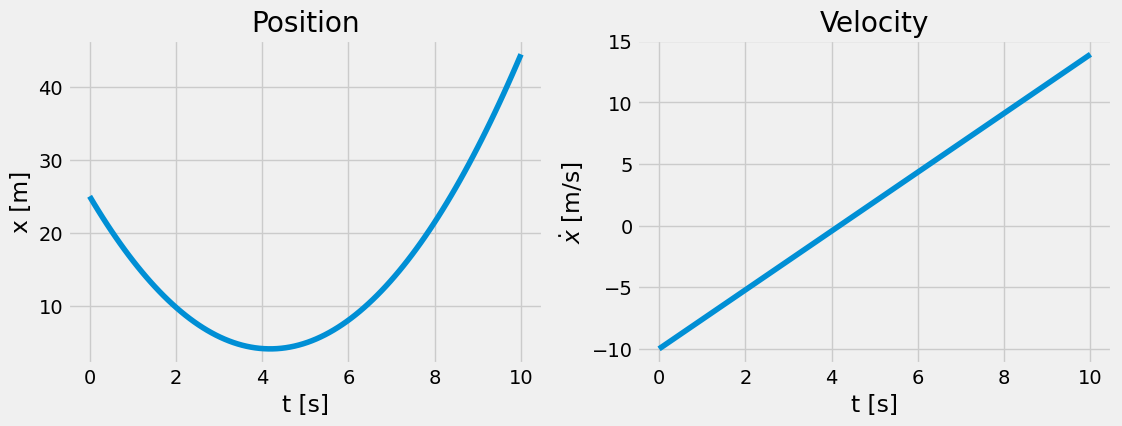

In [32]:
fig, ax = plt.subplots(nrows= 1, ncols= 2, squeeze=False, figsize=(12, 4)) # two figures in the same row
ax[0,0].set(xlabel='t [s]', ylabel='x [m]', title='Position')
ax[0,0].plot(y_ode2.t, y_ode2.y[0]) # row 0 column 0
ax[0,1].set(xlabel='t [s]', ylabel='$\dot{x}$ [m/s]', title='Velocity')
ax[0,1].plot(y_ode2.t, y_ode2.y[1]) # row 0 column 1

### Error in the numerical method

Let's compare it with the analytical solution.

We set functions that calculate position and velocity from the $\ddot{x}$ isolated in the Euler-Lagrange equation.

In [33]:
def x_mruv(a, v_0, x_0, t):
    return 0.5* a* t**2 + v_0* t + x_0

def v_mruv(a, v_0, t):
    return a* t + v_0

Then we plot the numerical solution, the analytical solution, and the difference to evaluate the error.

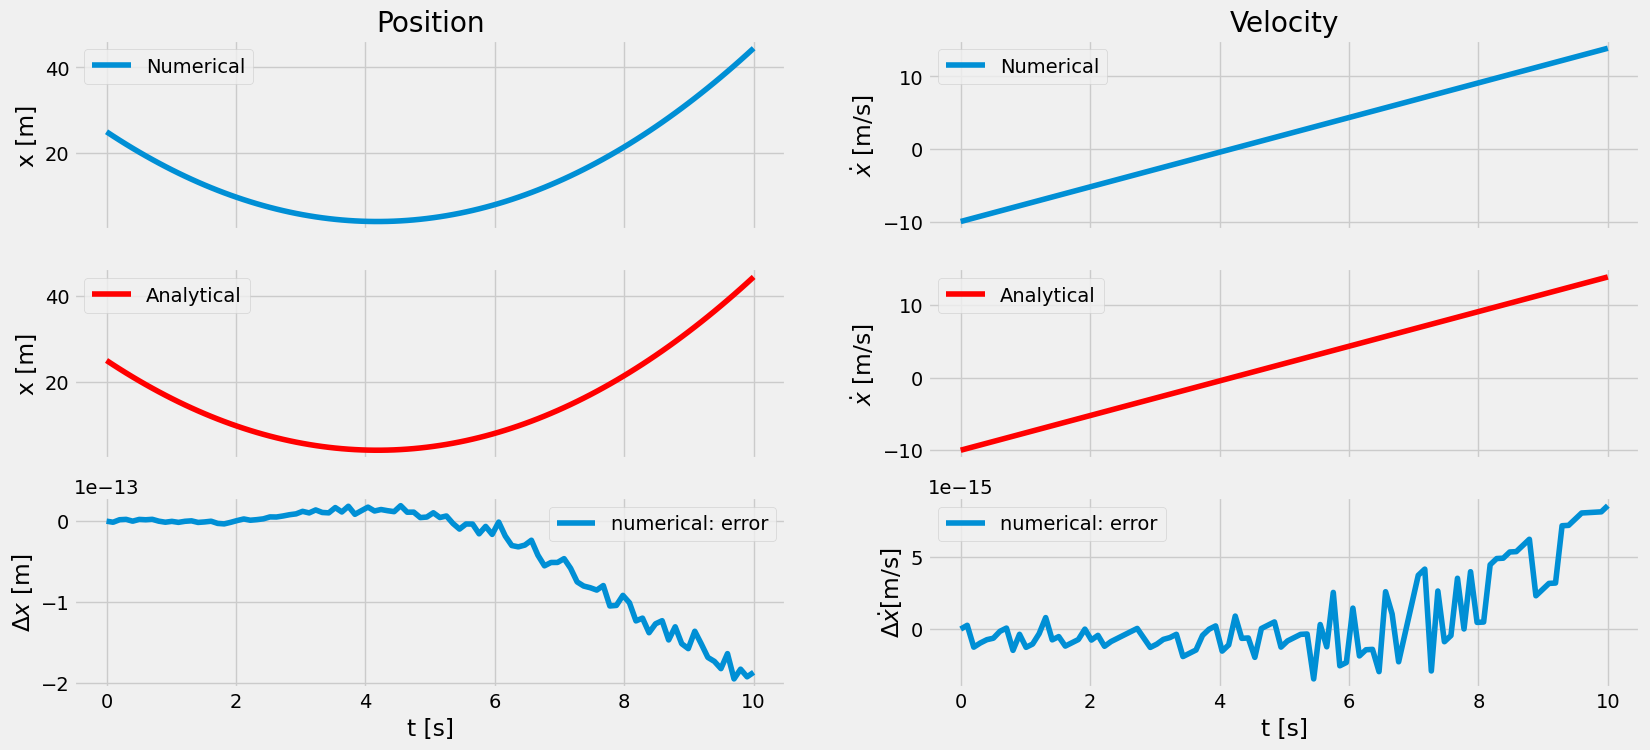

In [34]:
fig, ax = plt.subplots(nrows= 3, ncols= 2, figsize=(18, 8), sharex= True)

ax[0,0].set(ylabel='x [m]', title='Position')
ax[0,0].plot(y_ode2.t, y_ode2.y[0], label='Numerical') # row 0 column 0
ax[0,0].legend()

ax[1,0].set(ylabel='x [m]')
ax[1,0].plot(y_ode2.t, x_mruv(x1_pp_magnitudes.rhs, y_initial[1], y_initial[0], y_ode2.t), 'r', label='Analytical') # row 1 column 0
ax[1,0].legend()

ax[2,0].set(xlabel='t [s]', ylabel='$\Delta x$ [m]')
ax[2,0].plot(y_ode2.t, y_ode2.y[0] - x_mruv(x1_pp_magnitudes.rhs, y_initial[1], y_initial[0], y_ode2.t), label='numerical: error') # row 2 column 0
ax[2,0].legend()

ax[0,1].set(ylabel='$\dot{x}$ [m/s]', title='Velocity')
ax[0,1].plot(y_ode2.t, y_ode2.y[1], label='Numerical') # row 0 column 1
ax[0,1].legend()

ax[1,1].set(ylabel='$\dot{x}$ [m/s]')
ax[1,1].plot(y_ode2.t, v_mruv(x1_pp_magnitudes.rhs, y_initial[1], y_ode2.t), 'r', label='Analytical') # row 1 column 1
ax[1,1].legend()

ax[2,1].set(xlabel='t [s]', ylabel='$\Delta \dot{x}$[m/s]')
ax[2,1].plot(y_ode2.t, y_ode2.y[1] - v_mruv(x1_pp_magnitudes.rhs , y_initial[1], y_ode2.t), label='numerical: error') # row 2 column 1
ax[2,1].legend()

The integrating algorithm keeps the error of $x$ within the prescribed range. 
The threshold can be adjusted so that the prediction of $\dot{x}$ is modified in each $\Delta t_i$.
Thus, it _accumulates_ error, but its magnitude is negligible.